# 모델평가 적용

현재 다시 시도하는 중...

# Convert darknet model file to tensorflow type

## AIGuysCode github clone

In [ ]:
!git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 912, done.
remote: Total 912 (delta 0), reused 0 (delta 0), pack-reused 912
Receiving objects: 100% (912/912), 211.46 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (439/439), done.


In [ ]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


## requirement text file 수정
- 필요한 오픈소스 목록 리스트업해둔 파일 
- requirement text 파일로 필요 오픈소스 묶음 설치하기

In [ ]:
req_gpu_text = '''tensorflow-gpu==2.3.0
opencv-python==4.1.2.30
lxml
tqdm
absl-py
matplotlib
easydict
pillow
'''

with open('requirements-gpu.txt', 'w') as f:
    f.write(req_gpu_text)

In [ ]:
!pip install -r requirements-gpu.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.5 MB 1.7 kB/s 
     |████████████████████████████████| 28.3 MB 62.9 MB/s 
     |████████████████████████████████| 2.9 MB 71.8 MB/s 
     |████████████████████████████████| 20.6 MB 77.8 MB/s 
     |████████████████████████████████| 459 kB 110.5 MB/s 
     |████████████████████████████████| 26.0 MB 81.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found ex

## 학습된 weight파일 및 클래스네임 파일 gdown

In [ ]:
%cd /content/tensorflow-yolov4-tflite/data

/content/tensorflow-yolov4-tflite/data


In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# yolov4.weights file 다운로드
!gdown 1-2uy497X2o8tlOoNBWljITlAAqtaxYmi

Downloading...
From: https://drive.google.com/uc?id=1-2uy497X2o8tlOoNBWljITlAAqtaxYmi
To: /content/tensorflow-yolov4-tflite/data/yolov4-custom_best.weights
100% 256M/256M [00:03<00:00, 64.2MB/s]


In [ ]:
%cd /content/tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [ ]:
# dataset 다운로드
!gdown 1-3c67XQoIajZxJbgtrjtvsCR3ONkZh7a

Downloading...
From: https://drive.google.com/uc?id=1-3c67XQoIajZxJbgtrjtvsCR3ONkZh7a
To: /content/tensorflow-yolov4-tflite/disposable.zip
100% 237M/237M [00:03<00:00, 63.2MB/s]


In [ ]:
!unzip disposable.zip

Archive:  disposable.zip
  inflating: yolov4-custom_best.weights  
  inflating: chart.png               
  inflating: test.txt                
  inflating: train.txt               
  inflating: valid.txt               
  inflating: disposable.data         
  inflating: ClassNames.names        


In [ ]:
!gdown 1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj

Downloading...
From: https://drive.google.com/uc?id=1ThK0ywQ2wiG62oT3ud5GmHxfiY_DUxkj
To: /content/tensorflow-yolov4-tflite/yolov4-416.zip
100% 238M/238M [00:05<00:00, 39.7MB/s]


In [ ]:
!unzip yolov4-416.zip

Archive:  yolov4-416.zip
   creating: yolov4-416/assets/
  inflating: yolov4-416/saved_model.pb  
   creating: yolov4-416/variables/
  inflating: yolov4-416/variables/variables.data-00000-of-00001  
  inflating: yolov4-416/variables/variables.index  


In [ ]:
# ClassNames.names 생성
# w 모드로 name 파일을 생성
f = open('/content/tensorflow-yolov4-tflite/ClassNames.names', 'w')

# 문자 입력
f.write("cup_glass"+"\n")
f.write("cup_mug"+"\n")
f.write("cup_paper"+"\n")
f.write("cup_plastic"+"\n")
f.write("straw")

# 파일 닫기
f.close()

##  darknet weights -> tensorflow 형식으로 변환
- class name 파일 경로 : custom dataset class name 파일 경로로 수정

In [ ]:
## yolov4
## 파일 변환 (weights 파일에서 --> output 파일로)
!python save_model.py --weights ./yolov4-custom_best.weights --output ./yolov4-416 --input_size 608 --model yolov4

2022-12-16 01:59:13.941668: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 01:59:13.941711: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 01:59:15.215120: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-16 01:59:15.833784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-16 01:59:15.834395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 dev

모델 작동 확인

In [ ]:
!mv /content/카페CCTV추천_매장_카운터_홀전체보기.mp4_000045600.png /content/tensorflow-yolov4-tflite

In [ ]:
from PIL import Image
import cv2

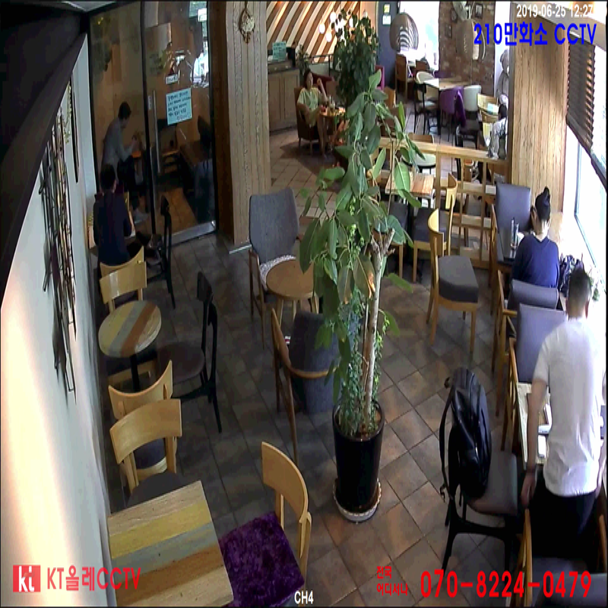

In [ ]:
img = Image.open('카페CCTV추천_매장_카운터_홀전체보기.mp4_000045600.png')
img.resize([608, 608])

In [ ]:
# yolov4 tensorflow model 실행
!python detect.py --weights ./yolov4-416 --size 608 --model yolov4 --images ./카페CCTV추천_매장_카운터_홀전체보기.mp4_000045600.png

2022-12-16 02:00:33.873766: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 02:00:33.873811: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 02:00:35.093710: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-16 02:00:35.716300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-16 02:00:35.716900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 dev

# 모델 성능 평가

## Modify config file
- YOLO.CLASSES : 커스텀 데이터셋 파일 경로로 수정

## Download custom-testset

In [ ]:
# yolov4.weights file 다운로드
!gdown 1-2uy497X2o8tlOoNBWljITlAAqtaxYmi

Downloading...
From: https://drive.google.com/uc?id=1-2uy497X2o8tlOoNBWljITlAAqtaxYmi
To: /content/tensorflow-yolov4-tflite/yolov4-custom_best.weights
100% 256M/256M [00:01<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3c67XQoIajZxJbgtrjtvsCR3ONkZh7a
To: /content/tensorflow-yolov4-tflite/disposable.zip
100% 237M/237M [00:01<00:00, 220MB/s]


In [ ]:
# dataset 다운로드
!gdown 1-3c67XQoIajZxJbgtrjtvsCR3ONkZh7a

## Evaluate custom model

In [ ]:
%cd /content

/content


In [ ]:
pwd

'/content/tensorflow-yolov4-tflite'

In [ ]:
import glob

In [ ]:
filenames = glob.glob('/test.txt/*.jpg')
filenames

[]

In [ ]:
len()

8

In [ ]:
# 저장 형식 : <imgfile_path> <xmin>,<ymin>,<xmax>,<ymax>,<label>
 
t = open('disposable.txt', 'w')

annots = ''
for filename in filenames:
    with open(filename) as f:
        lines = f.readlines()
        annot = f'{filename[:-3]}jpg'
        print(annot.split()[0])
        for line in lines:
            elements = line.strip().split()
            
            xc = float(elements[1])*416
            yc = float(elements[2])*416
            w = float(elements[3])*416
            h = float(elements[4])*416

            xmin = xc - w/2 
            ymin = yc - h/2
            xmax = xc + w/2
            ymax = yc + h/2
            label = int(elements[0])

            annot += ' '+f'{int(xmin)},{int(ymin)},{int(xmax)},{int(ymax)},{label}'
    annots += annot + '\n'
t.write(annots)
    

/content/images/soooo_jpg.rf.accf5a6d0b0fe444b354a2d293821715.jpg
/content/images/0ad90195-cd77-489e-bf85-08c83b80d3e0_jpg.rf.20ed8f759c47a565b60684cfd4524a21.jpg
/content/images/shutterstock_1627199179_jpg.rf.8432d033a37b3d142ec4ffcede508c7d.jpg
/content/images/stock-photo-mother-and-her-daughter-walking-go-to-school-with-wearing-a-protection-mask-against-pm-air-1346870465_jpg.rf.a6b929aae5f5f3dc8beac91039f8c85a.jpg
/content/images/1030611863_jpg.rf.aa3b539ebd06efc89eab0b823f128b96.jpg
/content/images/1477443223-1445746883_jpg.rf.d05e6a29597722ffcdb222614c353915.jpg
/content/images/w1240-p16x9-5f8aa310737f8e0e6c43d95a68a82b03b6f60106_jpg.rf.104bedd5b3bad4a0d0a453203e0617a3.jpg
/content/images/upload-productImg-1527496119162_320_234_jpeg.rf.d7affc7d5fe3df8bc9a7c5b9678a3c3c.jpg
/content/images/sdfsdfsfff_jpg.rf.c4aca6cc392df43f61e14ac002741ab6.jpg
/content/images/remote_(1)_jpeg.rf.df7fe4fb8181ab460fc57d04a9991de5.jpg
/content/images/TB2R28UvUOWBKNjSZKzXXXfWFXa_!!1116877752_jpg.rf.246ac

29445

- core/config.py 설정값 커스텀데이터로 변경  
    - YOLO.CLASSES 
    - TEST.ANNOT_PATH

In [ ]:
!python evaluate.py --weights ./yolov4-custom_best.weights --annotation_path ./disposable.data
# evaluate.py 파일의 annotation_path 수정 필요 (val_2017 --> mask_test.txt)
# /core/config 'Test.annot_path' 역시 val_2017 -> mask_test.txt로 수정

2022-12-16 01:11:25.426851: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 01:11:25.426895: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "evaluate.py", line 8, in <module>
    from core.yolov4 import filter_boxes
  File "/content/tensorflow-yolov4-tflite/core/yolov4.py", line 6, in <module>
    import core.utils as utils
  File "/content/tensorflow-yolov4-tflite/core/utils.py", line 127, in <module>
    def draw_bbox(image, bboxes, classes=read_class_names(cfg.YOLO.CLASSES), allowed_classes=list(read_class_names(cfg.YOLO.CLASSES).values()), show_label=True):
  File "/content/tensorflow-yolov4-tflite/core/utils.py", line 77, in read_class_names
    with open(class

In [ ]:
%cd /content/tensorflow-yolov4-tflite/mAP

/content/tensorflow-yolov4-tflite/mAP


In [ ]:
!python main.py

Error: No ground-truth files found!
